In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [ ]:
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [ ]:
test_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [ ]:
train_df = train_df.drop(columns=['ID_LAT_LON_YEAR_WEEK'])

In [ ]:
train_df

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [ ]:
test_df = test_df.drop(columns=['ID_LAT_LON_YEAR_WEEK'])

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
test_df.dropna(inplace=True)

In [ ]:
target_column = 'emission'

In [ ]:
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values

# Separate features in test data
X_test = test_df.values

In [ ]:
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
split_idx = int(len(X_train_scaled) * 0.8)
X_val_scaled = X_train_scaled[split_idx:]
y_val_scaled = y_train_scaled[split_idx:]
X_train_scaled = X_train_scaled[:split_idx]
y_train_scaled = y_train_scaled[:split_idx]

# Create sequences for LSTM
sequence_length = 10  # Example sequence length
train_generator = TimeseriesGenerator(X_train_scaled, y_train_scaled, length=sequence_length, batch_size=32)
val_generator = TimeseriesGenerator(X_val_scaled, y_val_scaled, length=sequence_length, batch_size=32)

In [ ]:
sequence_length = 10  # Example sequence length
train_generator = TimeseriesGenerator(X_train_scaled, y_train_scaled, length=sequence_length, batch_size=32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                25000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 25051 (97.86 KB)
Trainable params: 25051 (97.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
11/11 [==============================] - 5s 40ms/step - loss: 0.1768 - val_loss: 0.0232
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0389 - val_loss: 0.0147
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0225 - val_loss: 0.0084
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0177 - val_loss: 0.0134
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0167 - val_loss: 0.0078
Epoch 6/50
11/11 [==============================] - 0s 19ms/step - loss: 0.0156 - val_loss: 0.0102
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0155 - val_loss: 0.0072
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0150 - val_loss: 0.0093
Epoch 9/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0148 - val_loss: 0.0074
Epoch 10/50
11/11 [==============================] - 0s 31ms/step - loss: 0.0147 - val_loss: 0.0074
Epoch 11/

In [ ]:
# Evaluate the model using validation data
val_loss = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')

# Make predictions on the test data
test_generator = TimeseriesGenerator(X_test_scaled, np.zeros(len(X_test_scaled)), length=sequence_length, batch_size=32)
predictions = model.predict(test_generator)

# Inverse transform the predictions
predictions_inverse = scaler_y.inverse_transform(predictions)

# Print predictions
predictions_inverse

3/3 [==============================] - 0s 6ms/step - loss: 0.0092
Validation Loss: 0.009162725880742073
65/65 [==============================] - 0s 4ms/step


array([[-54.43245  ],
       [ -1.8505448],
       [-71.35446  ],
       ...,
       [ 78.59504  ],
       [136.74672  ],
       [128.00201  ]], dtype=float32)

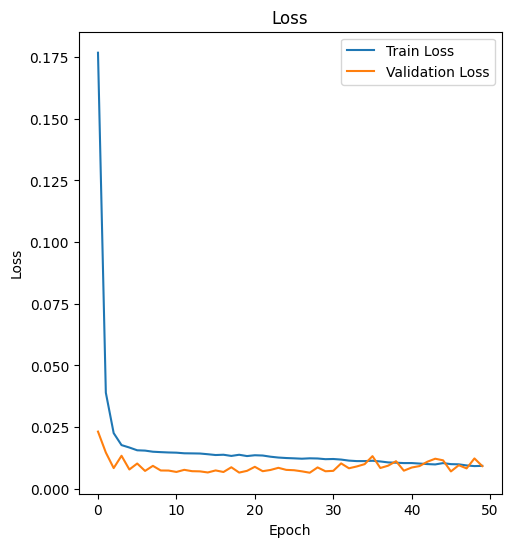

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot (if available)
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()


2067/2067 [==============================] - 8s 4ms/step


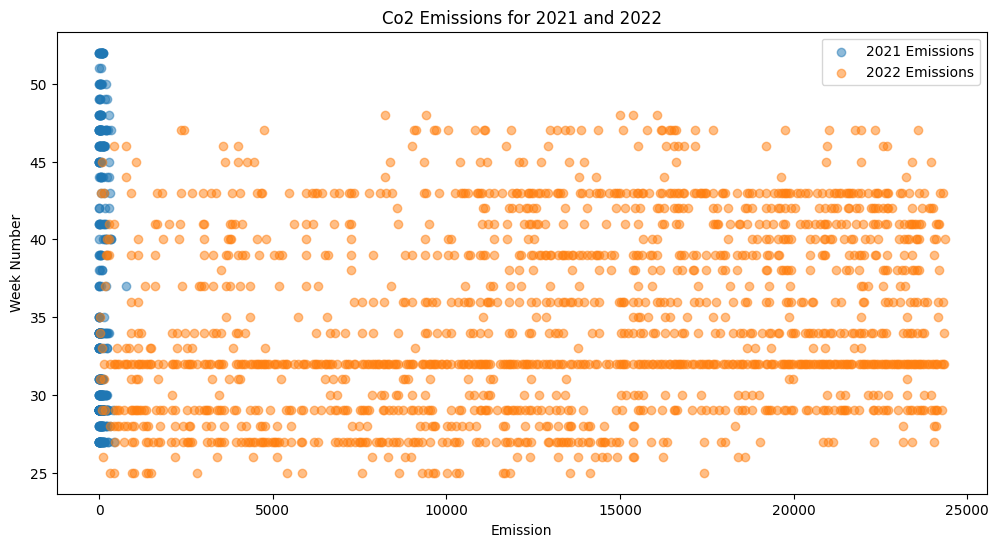

In [ ]:
test_generator = TimeseriesGenerator(X_test_scaled, np.zeros(len(X_test_scaled)), length=sequence_length, batch_size=1)

# Make predictions
predictions_scaled = model.predict(test_generator)
predictions = scaler_y.inverse_transform(predictions_scaled)

# Align the predictions with the test data indices
predictions_df = pd.DataFrame(predictions, columns=['predicted_emission'])
predictions_df['predicted_emission'] = range(sequence_length, sequence_length + len(predictions))

# Merge predictions with the original test_df
test_df['predicted_emission'] = test_df.index
test_df = test_df.merge(predictions_df, how='left', on='predicted_emission')

# Filter the data for the year 2021 and weeks 25 and above from the train_df and test_df
train_df_filtered = train_df[(train_df['year'] == 2021) & (train_df['week_no'] >= 25)]
test_df_filtered = test_df[(test_df['year'] == 2022) & (test_df['week_no'] >= 25)]

# Check if there are predicted emissions for the filtered data
if test_df_filtered.empty:
    print("No test data for the filtered weeks in 2021.")
else:
    # Plot actual vs. predicted emissions using scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(train_df_filtered['emission'], train_df_filtered['week_no'], label='2021 Emissions', alpha=0.5)
    plt.scatter(test_df_filtered['predicted_emission'], test_df_filtered['week_no'], label='2022 Emissions', alpha=0.5)
    plt.ylabel('Week Number')
    plt.xlabel('Emission')
    plt.title('Co2 Emissions for 2021 and 2022')
    plt.legend()
    plt.show()